# In this project we are implementing Image classification with help of Machine learning and Opencv library

In [1]:
import matplotlib.pyplot as plt
import cv2

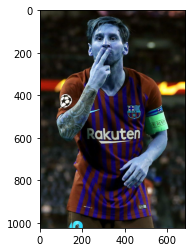

In [2]:
image=cv2.imread("images_dataset/lionel_messi/02453493f852c0efe8ff951dea5845c4.jpg")

plt.imshow(image)

In [3]:
detect_frontal_face=cv2.CascadeClassifier("OpenCv/HaarCascades/haarcascade_frontalface_default.xml")

detect_eyes=cv2.CascadeClassifier("OpenCv/HaarCascades/haarcascade_eye.xml")

# 1. we need to detect faces of celebrity and crop the faces in seperate folder:

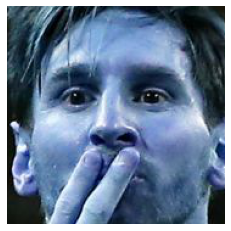

In [4]:
image=cv2.imread("images_dataset/lionel_messi/02453493f852c0efe8ff951dea5845c4.jpg")

gray_img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

faces=detect_frontal_face.detectMultiScale(gray_img,1.3,2)

for (x,y,w,h) in faces:
    roi_color=image[y:y+h,x:x+w]
    plt.imshow(roi_color)
    plt.axis('off')
    

# 2.We need to clean the data by removing the images where 2 eyes are not visibily shown:

2


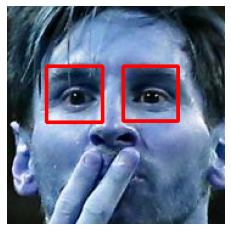

In [5]:
image=cv2.imread("images_dataset/lionel_messi/02453493f852c0efe8ff951dea5845c4.jpg")

gray_img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

faces=detect_frontal_face.detectMultiScale(gray_img,1.3,2)

for (x,y,w,h) in faces:
    roi_color=image[y:y+h,x:x+w]
    roi_gray=image[y:y+h,x:x+w]
    eyes=detect_eyes.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
        plt.imshow(roi_color)
        plt.axis('off')    

print(len(eyes))

# We can ignore the images where length of eyes is lesser than 2

In [6]:
def detect_images(image):
    image=cv2.imread(image)
    gray_img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces=detect_frontal_face.detectMultiScale(gray_img,1.3,2)
    for (x,y,w,h) in faces:
        roi_color=image[y:y+h,x:x+w]
        roi_gray=image[y:y+h,x:x+w]
        eyes=detect_eyes.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            if len(eyes)>=2:
                return roi_color
            else:
                return None

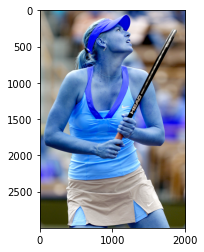

In [7]:
sample_img=cv2.imread("images_dataset/maria_sharapova/3-681.jpg")

plt.imshow(sample_img)

In [8]:
result=detect_images("images_dataset/maria_sharapova/3-681.jpg")

In [9]:
print(result)

None


In [10]:
image=detect_images("images_dataset/lionel_messi/02453493f852c0efe8ff951dea5845c4.jpg")

# Collect the cropped images and place it in cropped/{celebrity_name} folder:

In [19]:
#1.Scan the directories:

import os
path_list=[]
path="C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/"

for i in os.scandir(path):
    if i.is_dir():
        path_list.append(i.path)

In [20]:
path_list

['C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/lionel_messi',
 'C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/maria_sharapova',
 'C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/roger_federer',
 'C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/serena_williams',
 'C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/virat_kohli']

In [21]:
# Assigning classes to the celebrity:
classes={}
count=0
for j in path_list:
    key=j.split('/')[-1]
    classes[key]=count
    count=count+1

print(classes)

{'lionel_messi': 0, 'maria_sharapova': 1, 'roger_federer': 2, 'serena_williams': 3, 'virat_kohli': 4}


In [22]:
path_to_cropped_folder='C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/'

In [23]:
# Scanning the images and placing it in cropped folder:
cropped_list=[]
for entry in path_list:
    folder_directory=entry.split('/')[-1]
    counter=1
    for i in os.scandir(entry):
        roi_color=detect_images(i.path)
        if roi_color is not None:
            cropped_folder=path_to_cropped_folder+folder_directory
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_list.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name=folder_directory+'_'+str(counter)+'.png'
            cropped_file_path=cropped_folder+'/'+cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            counter=counter+1

Generating cropped images in folder:  C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/lionel_messi
Generating cropped images in folder:  C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/maria_sharapova
Generating cropped images in folder:  C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/roger_federer
Generating cropped images in folder:  C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/serena_williams
Generating cropped images in folder:  C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/virat_kohli


In [24]:
cropped_list

['C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/lionel_messi',
 'C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/maria_sharapova',
 'C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/roger_federer',
 'C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/serena_williams',
 'C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/virat_kohli']

# After cleaning the dataset manually we have to convert the images into array for classification:




In [25]:
# First for each celebrity name store the list of images:


celebrity_img_dict={}
for celebrity in cropped_list:
    celebrity_name=celebrity.split('/')[-1]
    celebrity_list=[]
    for i in os.scandir(celebrity):
        celebrity_list.append(i.path)
    celebrity_img_dict[celebrity_name]=celebrity_list

In [26]:
celebrity_img_dict

{'lionel_messi': ['C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/lionel_messi\\lionel_messi_1.png',
  'C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/lionel_messi\\lionel_messi_10.png',
  'C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/lionel_messi\\lionel_messi_11.png',
  'C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/lionel_messi\\lionel_messi_13.png',
  'C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/lionel_messi\\lionel_messi_14.png',
  'C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/lionel_messi\\lionel_messi_15.png',
  'C:/Users/a0g0btd/Documents/Anisha/ML project/CelebrityImageClassification/images_dataset/cropped/lionel_messi\\lionel_messi_16.png',
  'C:/Users/a0g0btd/Documents/Ani

# Applying wavelet transforms for all the images:

In [27]:
#In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [28]:
cropped_image=detect_images("images_dataset/lionel_messi/02453493f852c0efe8ff951dea5845c4.jpg")

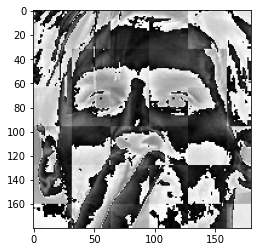

In [30]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

# Using these images for Model Training:

In [31]:
X=[]
Y=[]
for celebrity_names,training_image in celebrity_img_dict.items():
    for image in training_image:
        img=cv2.imread(image)
        scalled_img=cv2.resize(img,(32,32))
        
        wavelet_img=w2d(img,'db1',5)
        scalled_wavelet_img=cv2.resize(wavelet_img,(32,32))
        
        img_array=np.vstack((scalled_img.reshape(32*32*3,1),scalled_wavelet_img.reshape(32*32,1)))
        X.append(img_array)
        Y.append(classes[celebrity_names])

In [32]:
X[0]

array([[ 96],
       [129],
       [141],
       ...,
       [237],
       [234],
       [233]], dtype=uint8)

In [33]:
len(X[0])

4096

In [34]:
Y[0]

0

In [35]:
X=np.array(X).reshape(len(X),4096).astype(float)

In [36]:
X.shape

(175, 4096)

In [37]:
# Training the model:

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [38]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [39]:
ss=StandardScaler()

xtrain_scaled=ss.fit_transform(Xtrain)

xtest_scaled=ss.transform(Xtest)

# SVC Classifier

In [50]:
svc=SVC(probability=True)

gamma=['auto','scale']

C=[1,10,100,1000]

kernel=['rbf','linear']

param_distributions={"gamma":gamma,"C":C,"kernel":kernel}

gscv=GridSearchCV(estimator=svc,param_grid=param_distributions)

gscv.fit(xtrain_scaled,Ytrain)

predictions=gscv.predict(xtest_scaled)

In [51]:
gscv.score(xtest_scaled,Ytest)

0.8285714285714286

In [52]:
print(accuracy_score(Ytest,predictions))

print(classification_report(Ytest,predictions))

print(confusion_matrix(Ytest,predictions))

0.8285714285714286
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.69      0.90      0.78        10
           2       0.60      0.75      0.67         4
           3       1.00      0.50      0.67         6
           4       1.00      1.00      1.00         8

    accuracy                           0.83        35
   macro avg       0.86      0.80      0.81        35
weighted avg       0.87      0.83      0.83        35

[[6 1 0 0 0]
 [0 9 1 0 0]
 [0 1 3 0 0]
 [0 2 1 3 0]
 [0 0 0 0 8]]


# RandomForestClassifier

In [43]:
rfc=RandomForestClassifier()

n_estimators=[10,20,50,100]

criterion=['gini']

max_depth=[5,10,15]

min_samples_split=[3,6,9]

min_samples_leaf=[1,3,5,7]

max_features=['auto','sqrt']

param_grid={"n_estimators":n_estimators,"criterion":criterion,"max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf,"max_features":max_features}

grfc=GridSearchCV(estimator=rfc,param_grid=param_grid)

grfc.fit(xtrain_scaled,Ytrain)

randomforest_prediction=grfc.predict(xtest_scaled)



In [44]:
print(accuracy_score(Ytest,randomforest_prediction))

print(classification_report(Ytest,randomforest_prediction))

print(confusion_matrix(Ytest,randomforest_prediction))

0.7428571428571429
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.67      1.00      0.80        10
           2       0.40      0.50      0.44         4
           3       1.00      0.33      0.50         6
           4       1.00      0.88      0.93         8

    accuracy                           0.74        35
   macro avg       0.78      0.68      0.69        35
weighted avg       0.80      0.74      0.73        35

[[ 5  1  1  0  0]
 [ 0 10  0  0  0]
 [ 0  2  2  0  0]
 [ 0  2  2  2  0]
 [ 1  0  0  0  7]]


# Logistic Regression:



In [45]:
lr=LogisticRegression()

C=[1,5,10]

solver=['liblinear']

multi_class=['auto']

param_grid={"C":C,"solver":solver,"multi_class":multi_class}

gslr=GridSearchCV(estimator=lr,param_grid=param_grid)

gslr.fit(xtrain_scaled,Ytrain)

lr_predictions=gslr.predict(xtest_scaled)

In [46]:
print(accuracy_score(Ytest,lr_predictions))

print(classification_report(Ytest,lr_predictions))

print(confusion_matrix(Ytest,lr_predictions))

0.7428571428571429
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.69      0.90      0.78        10
           2       0.50      0.75      0.60         4
           3       1.00      0.33      0.50         6
           4       1.00      0.75      0.86         8

    accuracy                           0.74        35
   macro avg       0.79      0.72      0.71        35
weighted avg       0.80      0.74      0.73        35

[[6 1 0 0 0]
 [0 9 1 0 0]
 [0 1 3 0 0]
 [0 2 2 2 0]
 [2 0 0 0 6]]


# Inference:

We could see SVC is performing well compared to all classifiers

In [53]:
gscv.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}

# Saving the best model.

In [54]:
import joblib
joblib.dump(gscv,'saved_model.pkl')

['saved_model.pkl']

In [49]:
#Saving the Class dictionary:

import json
with open("class_dictionary.json",'w') as f:
    f.write(json.dumps(classes))